## Abstract :
### This project mainly focuses on handling imbalanced datasets and detecting credit-card frauds using Following Machine Learning Algorithms:

### a) Logistic Regression

### b) RandomForestClassifier


### These models are fittted to different datasets acquired after StandardScaler, Oversampling, Undersampling and SMOTE techniques. Thus, separate files are created for each Machine Learning Models so that every datasets acquired after above mentioned techniques are fitted separately to our model using single function.

### ABOUT DATASETS:
### This datasets have 492 frauds out of 284,807 transactions. It is highly unbalanced, the positive class--1 (frauds) account for 0.172% of all transactions.

### It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features are not provided and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

### Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset.But, we did not consider Time for training purpose as it is of no use to build the models and may not impact our target variable.

### The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

### Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## STEPS :
### Importing Libraries & Loading Datasets.

### Data Preprocessing & Preparing Datasets.

### Exploratoty Data Analysis(EDA) & Visualization.

### Handling Imbalanced Datasets.

### Conclusions.

### Further Enhancements.

###### JUST HAVE A CUP OF COFFEE IN FRONT OF YOU AND EXOLORE 😊 !!!
###### Let's Dive into the project 👇


### Importing libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Loading data set

In [62]:
main_df=pd.read_csv(r"C:\Users\NIET\Downloads\archive (7)\creditcard.csv")
main_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
main_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [64]:
main_df.shape

(284807, 31)

### Data processing and preparing

##### Checking data information

In [65]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### Checking null values

In [66]:
main_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### Checking unique values in dataset

In [67]:
main_df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

#### Checking duplicated values in dataset

In [68]:
main_df.duplicated().sum()

1081

#### Observing Statistical distribution of dataset

In [69]:
main_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Droping time attribute

In [70]:
main_df.drop("Time", axis=1, inplace=True)

In [89]:
X=main_df.drop("Class", axis=1)
y=main_df["Class"]
X.shape, y.shape

((284807, 29), (284807,))

In [90]:
temp_df=main_df.copy()

In [91]:
temp_df.shape

(284807, 30)

In [92]:
temp_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Normalizing attributes using StandardScaler

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
std_scaler = StandardScaler()

temp_df['Amount'] = std_scaler.fit_transform(temp_df['Amount'].values.reshape(-1,1))
X_scaled = temp_df.drop('Class', axis=1)
y_scaled = temp_df['Class']
X_scaled.shape, y_scaled.shape

((284807, 29), (284807,))

### EDA & Visualization.

#### Making data ready for analysis

In [96]:
class_count_df = pd.DataFrame(main_df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Normal',
                                 1:'Fraud'}, inplace=True)
class_count_df.head()

,Class,Counts
0,Normal,284315
1,Fraud,492


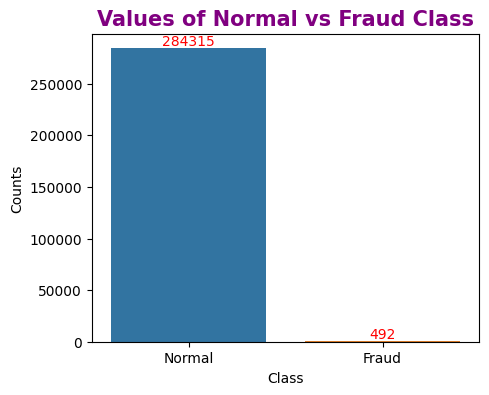

In [103]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Values of Normal vs Fraud Class', fontsize=15, fontweight='bold').set_color('purple')
plt.show()

#### Analyzing before plotting graph of Variation of Amount per Class

In [105]:
print("No fraud Transaction", round(main_df["Class"].value_counts()[0]/len(main_df)*100,2),"% of total transaction")
print("Fraud Transaction", round(main_df["Class"].value_counts()[1]/len(main_df)*100,2),"% of total transaction")

No fraud Transaction 99.83 % of total transaction
Fraud Transaction 0.17 % of total transaction


In [109]:
fraud=main_df[main_df["Class"]==1]
Normal=main_df[main_df["Class"]==0]
fraud.shape, Normal.shape

((492, 30), (284315, 30))

In [110]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [111]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

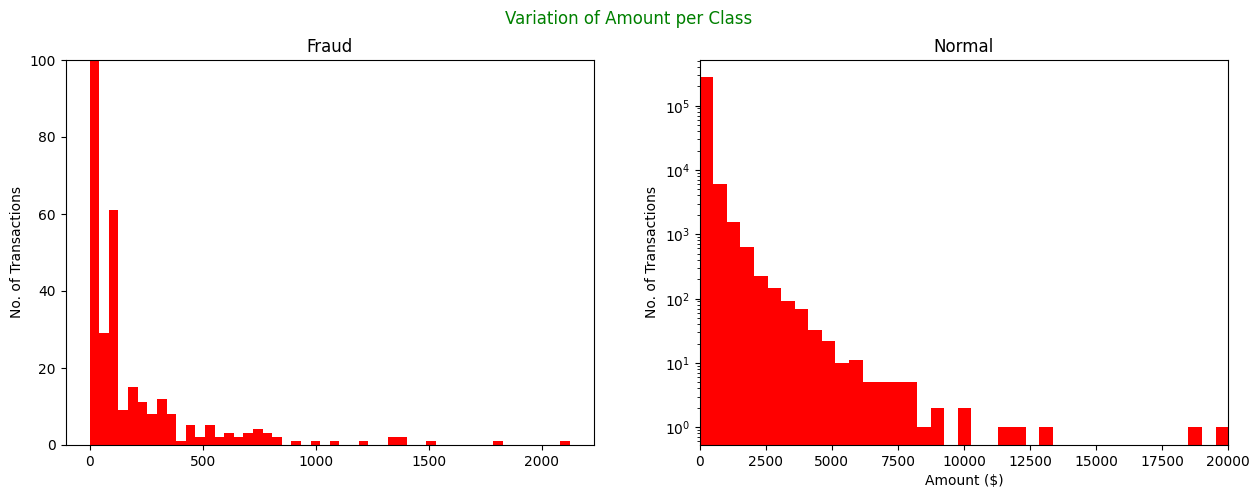

In [137]:
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(Normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

### Handling Imbalanced dataset

#### Resampling (Undersampling, oversampling)

### Oversampling

In [141]:
main_df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

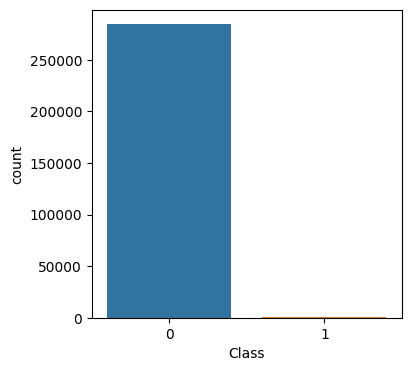

In [154]:
plt.figure(figsize=(4,4))
sns.countplot(main_df, x="Class")
plt.show()

In [142]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = main_df[(main_df['Class']==0)] 
df_minority = main_df[(main_df['Class']==1)]

# upsample minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=284315,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()

Class
1    284315
0    284315
Name: count, dtype: int64

In [161]:
X_oversampled = df_oversampled.drop('Class', axis=1)
y_oversampled = df_oversampled['Class']
X_oversampled.shape, y_oversampled.shape

((568630, 29), (568630,))

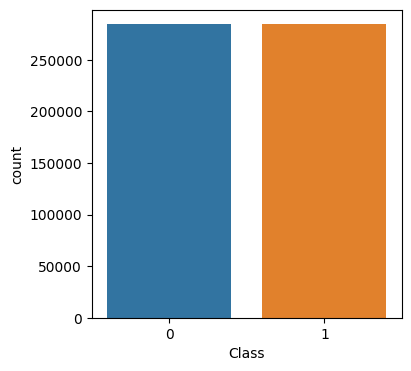

In [155]:
plt.figure(figsize=(4,4))
sns.countplot(df_oversampled, x="Class")
plt.show()

In [157]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(f"The number of Classes before the fit {Counter(y)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0: 284315, 1: 492})
The number of Classes after the fit Counter({0: 492, 1: 492})


### SMOTE(Synthetic Minority Oversampling Technique)

In [158]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(main_df.drop('Class', axis=1), main_df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(568630, 29)

In [159]:
smote_df.Class.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64